<a href="https://colab.research.google.com/github/jaden-2/Assignment/blob/master/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, datasets, svm, tree, ensemble, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import random

### Problem 1
 Data extraction

In [93]:
iris = datasets.load_iris(as_frame=True)

target = iris.target_names
iris_feat = iris.data
iris_targ = iris.target
iris_targ.name = "species"

iris = pd.concat([iris_feat, iris_targ], axis=1)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
target


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Data processing, dropping of unwanted features

In [95]:
iris = iris[iris["species"].isin([1, 2])]
iris.drop(["sepal width (cm)", "petal width (cm)"], axis=1, inplace=True)
iris.reset_index(inplace=True)




In [96]:
iris.head()

,index,sepal length (cm),petal length (cm),species
0,50,7.0,4.7,1
1,51,6.4,4.5,1
2,52,6.9,4.9,1
3,53,5.5,4.0,1
4,54,6.5,4.6,1


### Problem 2
#### Visualisation of dataset

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

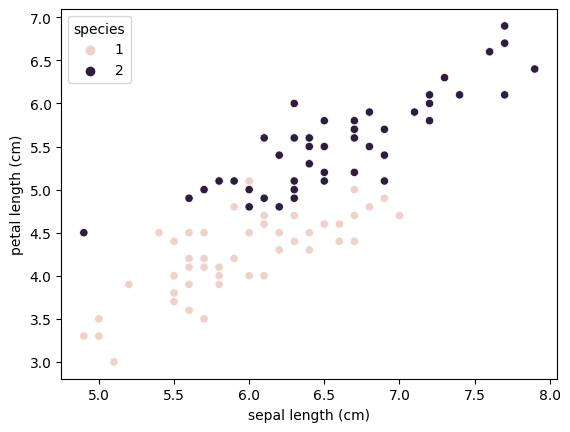

In [97]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=iris)


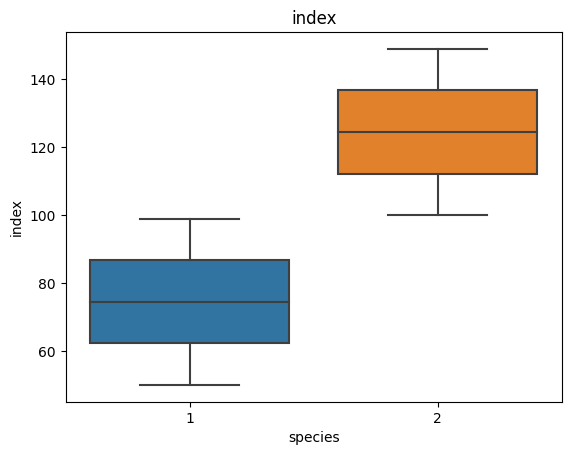

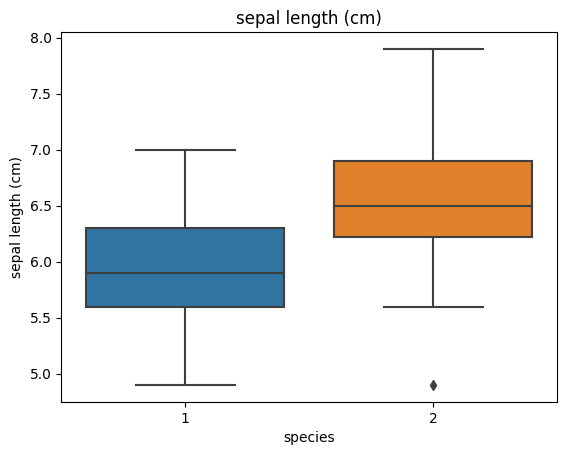

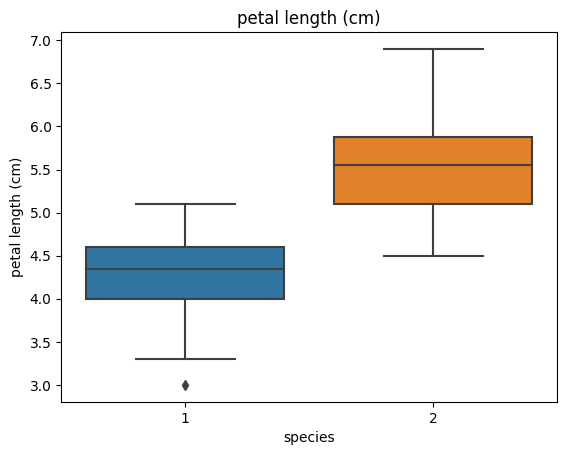

In [98]:
#boxplot representation of data
for x in iris.keys()[:-1]:
  plt.title(x)
  sns.boxplot(iris, y=x, x="species")
  plt.show()

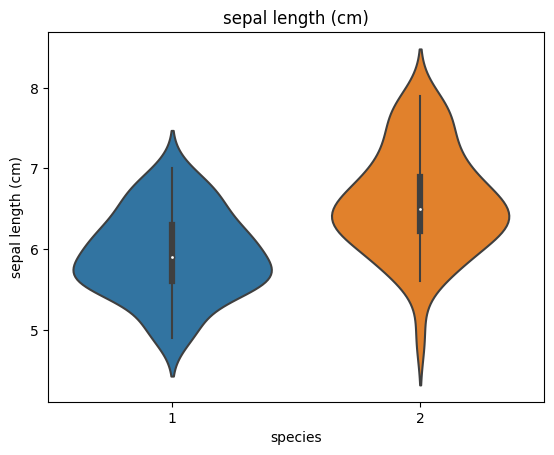

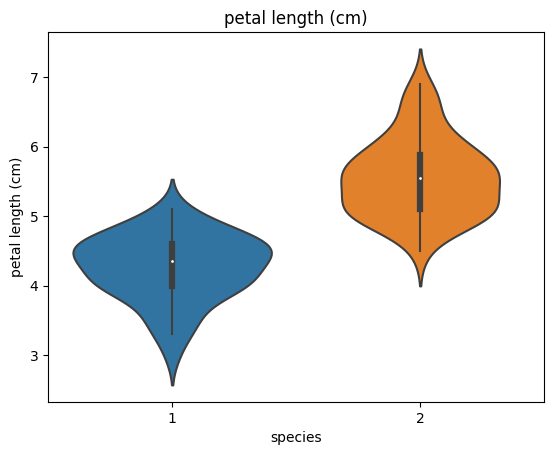

In [99]:
#voilinplot representation of data
for x in iris.keys()[1:-1]:
  plt.title(x)
  sns.violinplot(iris, y=x, x="species")
  plt.show()

### Problem 3
#### Numerical feature engineering

In [100]:
#process and normalize
iris.describe()

,index,sepal length (cm),petal length (cm),species
count,100.000000,100.000000,100.000000,100.000000
mean,99.500000,6.262000,4.906000,1.500000
std,29.011492,0.662834,0.825578,0.502519
min,50.000000,4.900000,3.000000,1.000000
25%,74.750000,5.800000,4.375000,1.000000
50%,99.500000,6.300000,4.900000,1.500000
75%,124.250000,6.700000,5.525000,2.000000
max,149.000000,7.900000,6.900000,2.000000


In [101]:
iris.keys()

Index(['index', 'sepal length (cm)', 'petal length (cm)', 'species'], dtype='object')

In [102]:
features = ['sepal length (cm)', 'petal length (cm)']

target = ["species"]



### Problem 3
#### Train, test split dataset for model training

In [103]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris[features], iris[target], test_size=0.25, random_state=123)

### Problem 4
#### Pretreament/ standardization

In [104]:
#Standardization of dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train, y_test = np.ravel(y_train), np.ravel(y_test)


### Problem 5
#### Model training

In [105]:
# K neighbors set to 5
KNN5 = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
pred5 = KNN5.predict(x_test)

# K neighbors set to 3
KNN3 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
pred3 = KNN3.predict(x_test)

# K neightbors set to 1

KNN1 = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
pred1= KNN1.predict(x_test)


print(f"N_neighbors=5 : {pred5}")
print(f"N_neighbors=3 : {pred3}")
print(f"N_neighbors=1 : {pred1}")

N_neighbors=5 : [1 2 2 1 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1]
N_neighbors=3 : [1 2 2 1 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1]
N_neighbors=1 : [1 2 2 1 2 1 1 2 2 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1]


### Problem 6
#### Evaluation

In [106]:
# Accuracy
predictions = [pred5, pred3, pred1]

for x, prediction in enumerate(predictions):
  #accuracy
  acc = metrics.accuracy_score(y_test,prediction )
  #precision
  prec = metrics.precision_score(y_test, prediction)
  #recall
  recall = metrics.recall_score(y_test, prediction)
  #f score
  f1 = metrics.f1_score(y_test, prediction)
  #confusion matrix
  cm = metrics.confusion_matrix(y_test, prediction)
  k = 5-(x*2)
  print(f"K_neighbor={k} \n\r Accuracy: {acc} \n\r Precision: {prec} \n\r Recall: {recall} \n\r f1-Score: {f1} \n\r Confusion matrix: \n{cm} \n")

K_neighbor=5 
 Accuracy: 0.84 
 Precision: 0.7647058823529411 
 Recall: 1.0 
 f1-Score: 0.8666666666666666 
 Confusion matrix: 
[[13  0]
 [ 4  8]] 

K_neighbor=3 
 Accuracy: 0.84 
 Precision: 0.7647058823529411 
 Recall: 1.0 
 f1-Score: 0.8666666666666666 
 Confusion matrix: 
[[13  0]
 [ 4  8]] 

K_neighbor=1 
 Accuracy: 0.88 
 Precision: 0.8125 
 Recall: 1.0 
 f1-Score: 0.896551724137931 
 Confusion matrix: 
[[13  0]
 [ 3  9]] 



### Problem 7
#### Visualisation function

In [107]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

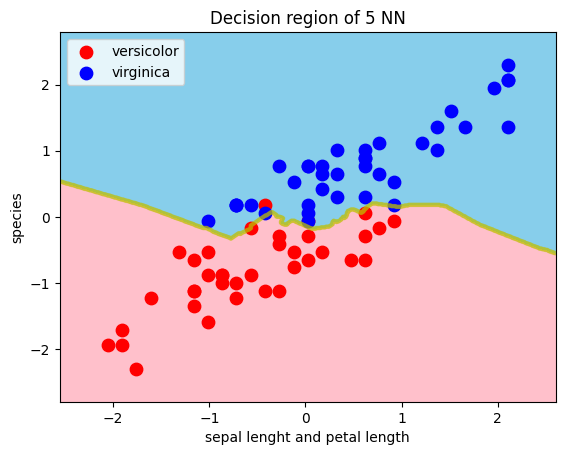

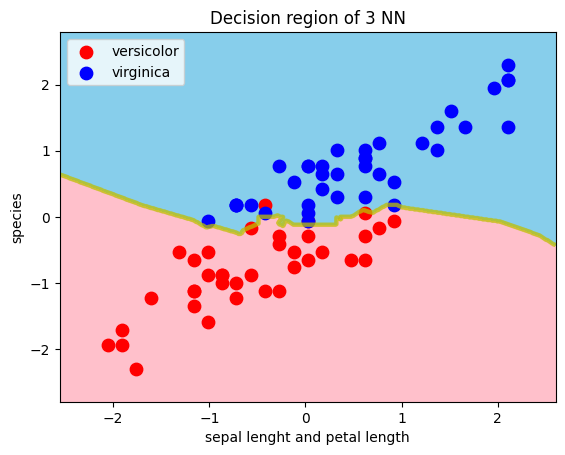

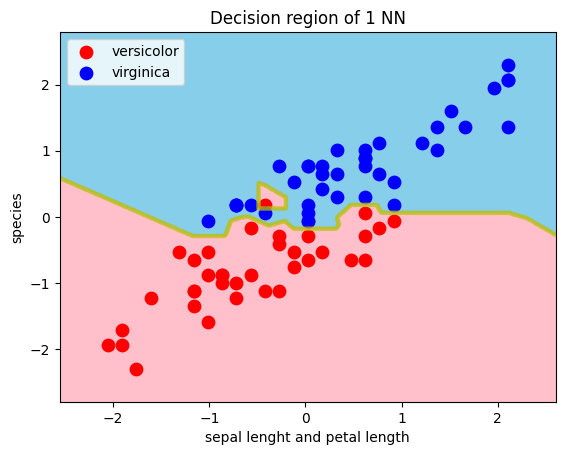

In [108]:
# Visualization of the prediction of models
models = [KNN5, KNN3, KNN1]

for x, model in enumerate(models):
  k = 5-(x*2)
  decision_region(x_train, y_train, model, xlabel="sepal lenght and petal length", ylabel="species", title=f"Decision region of {k} NN")

### Problem 8
#### Training other models

In [109]:

evaluation = {
    "model": [],
    "accuracy":[],
    "precision":[],
    "recall": [],
    "f1-Score": [],
    "confusion matrix": []
}



##### Linear regression

In [110]:
# Grid search cross validation

logisticModel = linear_model.LogisticRegression()
search_params = {
    "penalty": ["l1", "l2", "elasticnet"],
    "dual" : [True, False],
    "tol": [1e-5, 1e-6],
    "C": [1, 10, 3, 0.5]
}
GS = model_selection.GridSearchCV(estimator=logisticModel, param_grid=search_params, scoring=["accuracy", "precision", "recall", "f1"], refit="f1", cv= 5, verbose=3)
GS.fit(x_train, y_train)

GS.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1, dual=True, penalty=l1, tol=1e-05; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=1, dual=True, penalty=l1, tol=1e-05; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=1, dual=True, penalty=l1, tol=1e-05; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/5] END C=1, dual=True, penalty=l1, tol=1e-05; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/5] END C=1, dual=True, penalty=l1, tol=1e-05; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=1, dual=True, penalty=l1, tol=1e-06; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=1, dual=True, penalty=l1, tol=1e-06

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

{'C': 3, 'dual': False, 'penalty': 'l2', 'tol': 1e-05}

In [111]:
param = GS.best_params_

logisticModel = linear_model.LogisticRegression(C=3, tol=1e-5).fit(x_train, y_train)
prediction = logisticModel.predict(x_test)

met = [ "Logistic regression", metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction), metrics.recall_score(y_test, prediction),
       metrics.f1_score(y_test, prediction), metrics.confusion_matrix(y_test, prediction)]

for i, key in enumerate(evaluation.keys()):
  evaluation[key].append(met[i])

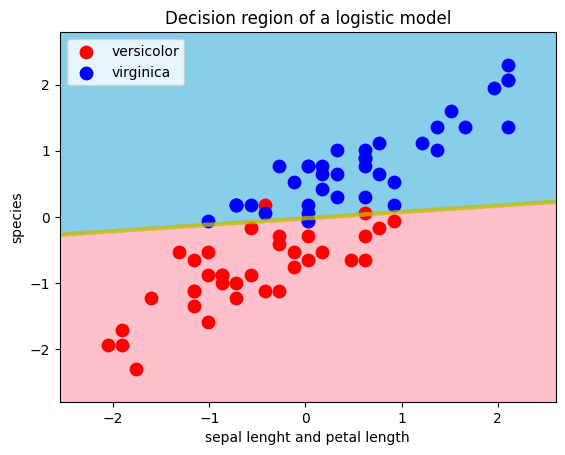

In [112]:
decision_region(x_train, y_train, logisticModel, xlabel="sepal lenght and petal length", ylabel="species", title="Decision region of a logistic model")

#### Support vector classifier

In [113]:
svc = svm.SVC()

search_params = {
    "C": [5, 10, 0.1, 0.5, 3],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

GS = model_selection.GridSearchCV(estimator=svc, cv=5, param_grid=search_params, scoring=["accuracy", "precision", "recall", "f1"], refit="f1", verbose=4)

GS.fit(x_train, y_train)
GS.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=5, gamma=scale, kernel=linear; accuracy: (test=0.933) f1: (test=0.923) precision: (test=1.000) recall: (test=0.857) total time=   0.0s
[CV 2/5] END C=5, gamma=scale, kernel=linear; accuracy: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 3/5] END C=5, gamma=scale, kernel=linear; accuracy: (test=1.000) f1: (test=1.000) precision: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/5] END C=5, gamma=scale, kernel=linear; accuracy: (test=0.933) f1: (test=0.933) precision: (test=1.000) recall: (test=0.875) total time=   0.0s
[CV 5/5] END C=5, gamma=scale, kernel=linear; accuracy: (test=0.933) f1: (test=0.941) precision: (test=0.889) recall: (test=1.000) total time=   0.0s
[CV 1/5] END C=5, gamma=scale, kernel=poly; accuracy: (test=0.800) f1: (test=0.727) precision: (test=1.000) recall: (test=0.571) total time=   0.0s
[CV 2/5] END C=5, gamma=scale, kernel=po

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [114]:
GS.best_params_

svc = svm.SVC(C= 10, gamma="scale", kernel="linear").fit(x_train, y_train)
prediction = svc.predict(x_test)

# metrics = [model, accuracy, precision, recall, f1, confusion matric]
met = [ "Support vector", metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction), metrics.recall_score(y_test, prediction),
       metrics.f1_score(y_test, prediction), metrics.confusion_matrix(y_test, prediction)]

for i, key in enumerate(evaluation.keys()):
  evaluation[key].append(met[i])

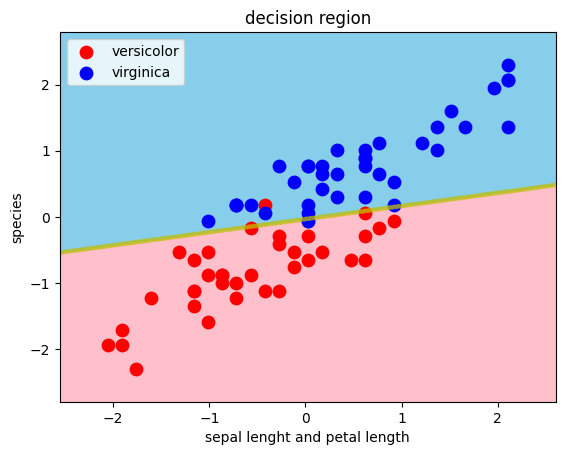

In [115]:
decision_region(x_train, y_train, svc, xlabel="sepal lenght and petal length", ylabel="species")

#### Decision tree

In [116]:
decisionTree = tree.DecisionTreeClassifier()

search_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 3],
}

GS = model_selection.GridSearchCV(estimator=decisionTree, param_grid=search_params, scoring=["accuracy", "precision", "recall", "f1"], refit="f1", cv=5).fit(x_train, y_train)

GS.best_params_


{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}

In [117]:
decisionTree = tree.DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="random").fit(x_train, y_train)
prediction = decisionTree.predict(x_test)

# metrics = [model, accuracy, precision, recall, f1, confusion matric]
met = [ "Decision tree", metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction), metrics.recall_score(y_test, prediction),
       metrics.f1_score(y_test, prediction), metrics.confusion_matrix(y_test, prediction)]

for i, key in enumerate(evaluation.keys()):
  evaluation[key].append(met[i])

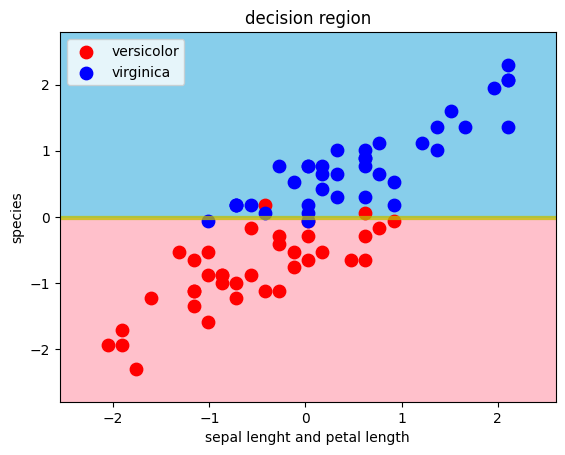

In [118]:
decision_region(x_train, y_train, decisionTree, xlabel="sepal lenght and petal length", ylabel="species")

#### Random Forest

In [119]:
forest = ensemble.RandomForestClassifier()

search_params = {
    "n_estimators": [100, 500, 1000, 200],
    "criterion": ["gini", "entropy", "log_loss"],
}

GS = model_selection.GridSearchCV(estimator=forest, param_grid=search_params, cv=5, scoring=["accuracy", "precision", "recall", "f1"], refit="f1").fit(x_train, y_train)
GS.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [120]:
forest = ensemble.RandomForestClassifier(n_estimators=100, criterion="gini").fit(x_train, y_train)
prediction = forest.predict(x_test)

# metrics = [accuracy, precision, recall, f1, confusion matric]
met = ["Random forest", metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction), metrics.recall_score(y_test, prediction),
       metrics.f1_score(y_test, prediction), metrics.confusion_matrix(y_test, prediction)]

for i, key in enumerate(evaluation.keys()):
  evaluation[key].append(met[i])

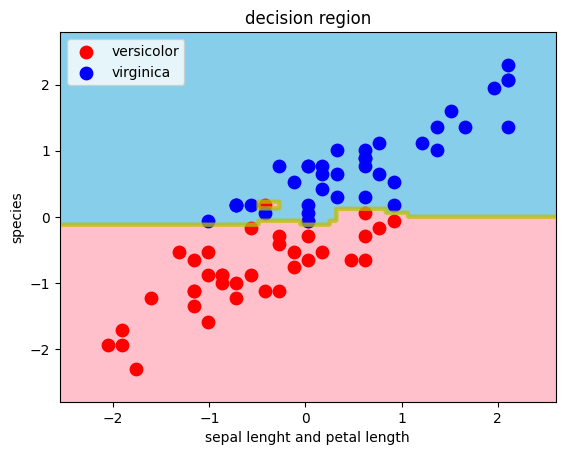

In [121]:
decision_region(x_train, y_train, forest, xlabel="sepal lenght and petal length", ylabel="species")

#### Evaluation

In [122]:
evaluation = pd.DataFrame(evaluation)



### Problem 9

In [123]:
def performanceMetric(data, features, target, test_size):
  """
  Evaluate the perfomance of KNN, Logistic regression, SVC, Decision tree, and random forest
  based on accuracy, precision, recall, and f1 scores

  #### data: Dataframe containing datasets
  #### features: List of features in the dataset
  #### target: Target variable

  #### returns: Dataframe containing scores of each model
  """
  x_train, x_test, y_train, y_test = model_selection.train_test_split(data[features], data[target], test_size=test_size, random_state=235)
  y_train, y_test = np.ravel(y_train), np.ravel(y_test)

  #model instantiation
  knn, logistic = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train), linear_model.LogisticRegression(C=3, tol=1e-5).fit(x_train, y_train)
  svc, dt = svm.SVC(C= 10, gamma="scale", kernel="linear").fit(x_train, y_train), tree.DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="random").fit(x_train, y_train)
  rf = ensemble.RandomForestClassifier(n_estimators=100, criterion="gini").fit(x_train, y_train)

  model_names = ["K nearest neighbor", "Logistic regression", "Support vector classifier", "Decision tree", "Random forest"]
  models = [ knn, logistic, svc, dt, rf]

  #store evaluations
  evaluation = {
    "model": [],
    "accuracy":[],
    "precision":[],
    "recall": [],
    "f1-Score": [],
    "confusion matrix": []
  }
  for i, model_ in enumerate(models):
    prediction = model_.predict(x_test)
    scores = [model_names[i], metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction), metrics.recall_score(y_test, prediction),
       metrics.f1_score(y_test, prediction), metrics.confusion_matrix(y_test, prediction)]

    for x, key in enumerate(evaluation.keys()):
      evaluation[key].append(scores[x])

  return pd.DataFrame(evaluation)


In [124]:
from scipy import stats

print(stats.skew(iris[features]))

print(stats.kurtosis(iris[features]))

[0.30391222 0.16849665]
[-0.13998536 -0.36822358]


In [125]:
# perfomance without standardization
performanceMetric(iris, features, target, 0.25)

,model,accuracy,precision,recall,f1-Score,confusion matrix
0,K nearest neighbor,0.76,0.833333,0.714286,0.769231,"[[10, 4], [2, 9]]"
1,Logistic regression,0.84,0.916667,0.785714,0.846154,"[[11, 3], [1, 10]]"
2,Support vector classifier,0.84,0.916667,0.785714,0.846154,"[[11, 3], [1, 10]]"
3,Decision tree,0.60,0.700000,0.500000,0.583333,"[[7, 7], [3, 8]]"
4,Random forest,0.84,0.916667,0.785714,0.846154,"[[11, 3], [1, 10]]"


In [126]:
# Perfomace when I standardized
evaluation

,model,accuracy,precision,recall,f1-Score,confusion matrix
0,Logistic regression,0.84,0.764706,1.0,0.866667,"[[13, 0], [4, 8]]"
1,Support vector,0.88,0.812500,1.0,0.896552,"[[13, 0], [3, 9]]"
2,Decision tree,0.84,0.764706,1.0,0.866667,"[[13, 0], [4, 8]]"
3,Random forest,0.88,0.812500,1.0,0.896552,"[[13, 0], [3, 9]]"


#### Standardization refers to the process of transforming data in a way that centers and scales it, making it easier to compare and analyze. The objective is to is scale the variables to a standard range.

---
#### From my analysis, I observed that for different random states the dataset that wasn't normalized performed differently. There were times the models outperform the standardized datasets. However, for the standardized dataset a consistent perfomance is observed for each model.

---

#### The tables above show the results of my evaluations. The models performed poorly when the data wasn't normalized. By calculating the skewness of the features, I found that the dataset is positively skewed. This means that most of the values are concentrated on the left hand side of the curve and that the distribution of the values is not normal; this would affect the perfomance of the models if the dataset is not normalized.







### Problem 10

In [127]:
#modified function
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    X = X.values
    # setting
    scatter_color = ['red', 'blue', "green"]
    contourf_color = ['pink', 'skyblue', "cyan"]
    n_class = len(np.unique(y))

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [128]:
def performanceMetric(data, features, target, test_size):
  """
  Evaluate the perfomance of KNN, Logistic regression, SVC, Decision tree, and random forest
  based on accuracy, precision, recall, and f1 scores

  #### data: Dataframe containing datasets
  #### features: List of features in the dataset
  #### target: Target variable

  #### returns: Dataframe containing scores of each model
  """
  x_train, x_test, y_train, y_test = model_selection.train_test_split(data[features], data[target], test_size=test_size, random_state=235)
  y_train, y_test = np.ravel(y_train), np.ravel(y_test)

  #model instantiation
  knn, logistic = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train), linear_model.LogisticRegression(C=3, tol=1e-5).fit(x_train, y_train)
  svc, dt = svm.SVC(C= 10, gamma="scale", kernel="linear").fit(x_train, y_train), tree.DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="random").fit(x_train, y_train)
  rf = ensemble.RandomForestClassifier(n_estimators=100, criterion="gini").fit(x_train, y_train)

  model_names = ["K nearest neighbor", "Logistic regression", "Support vector classifier", "Decision tree", "Random forest"]
  models = [ knn, logistic, svc, dt, rf]

  #store evaluations
  evaluation = {
    "model": [],
    "accuracy":[],
    "precision":[],
    "recall": [],
    "f1-Score": [],
    "confusion matrix": []
  }
  for i, model_ in enumerate(models):
    prediction = model_.predict(x_test)
    scores = [model_names[i], metrics.accuracy_score(y_test, prediction), metrics.precision_score(y_test, prediction, average='weighted'), metrics.recall_score(y_test, prediction, average='weighted'),
       metrics.f1_score(y_test, prediction, average='weighted'), metrics.confusion_matrix(y_test, prediction)]

    for x, key in enumerate(evaluation.keys()):
      evaluation[key].append(scores[x])

  return pd.DataFrame(evaluation)


In [129]:
data = datasets.load_iris(as_frame=True)
target_names = data.target_names
data = pd.concat((data.data, data.target), axis=1)
data.drop([x for x in data.keys() if x not in (features + ["target"]) ], axis=1, inplace=True)

data.head()


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [130]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data[features], data["target"], test_size=0.2)

y_train = np.ravel(y_train)

knn = KNeighborsClassifier().fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


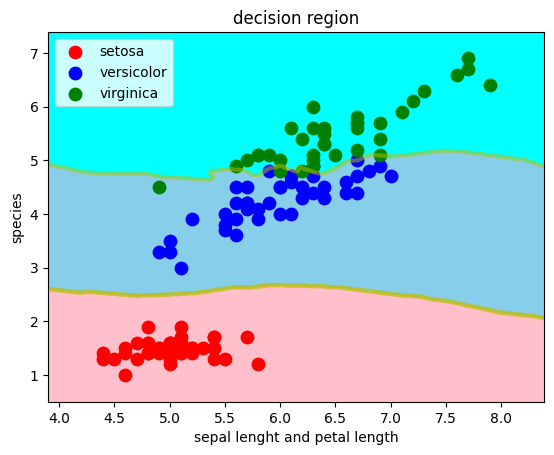

In [131]:
decision_region(x_train, y_train, knn, target_names=target_names, xlabel="sepal lenght and petal length", ylabel="species")

In [132]:
print("Multi class metrics")
performanceMetric(data, features, "target", 0.2 )

Multi class metrics


,model,accuracy,precision,recall,f1-Score,confusion matrix
0,K nearest neighbor,0.933333,0.945455,0.933333,0.932500,"[[12, 0, 0], [0, 7, 2], [0, 0, 9]]"
1,Logistic regression,0.933333,0.945455,0.933333,0.932500,"[[12, 0, 0], [0, 7, 2], [0, 0, 9]]"
2,Support vector classifier,0.933333,0.945455,0.933333,0.932500,"[[12, 0, 0], [0, 7, 2], [0, 0, 9]]"
3,Decision tree,0.900000,0.925000,0.900000,0.897143,"[[12, 0, 0], [0, 6, 3], [0, 0, 9]]"
4,Random forest,0.900000,0.925000,0.900000,0.897143,"[[12, 0, 0], [0, 6, 3], [0, 0, 9]]"
